# Toy Clustering and Classification

## Project Description

This project is the continuation of a previous project for products classification requested by a client based in China. The company operations are exportation of different kinds of toys from several suppliers in China to multinational supermarket chains established in LATAM. From the previous project, we have already found an insight that we might classify products, for the purppose of understanding, if they tend to be **weight-related cargoes** (*more weight than volume*)or **volume-related cargoes** (*more volume than weight*).

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = os.getcwd()
print(path)

/Users/mariomauvecin/Desktop


In [3]:
os.chdir('/Users/mariomauvecin/Desktop/DATA SCIENCE/DATA SCIENCE PROJECTS/TOY EXPORTATION') #Changing the Directory

In [4]:
os.getcwd()

'/Users/mariomauvecin/Desktop/DATA SCIENCE/DATA SCIENCE PROJECTS/TOY EXPORTATION'

In [5]:
toy_df = pd.read_csv('Suppliers_Catalog.csv', sep=';', header= 0, decimal = '.') 

In [6]:
toy_df.shape

(10000, 17)

In [7]:
toy_df.columns

Index(['Item No#', 'Description', 'Package', 'INNER', 'Qty/Ctn', 'CBM',
       'Carton long (cm)', 'Carton width', 'Carton height', 'Product long',
       'Product width', 'Product height', 'Packaging long', 'Packaging width',
       'Packaging height', 'GW(KGS)', 'NW(KGS)'],
      dtype='object')

In [9]:
toy_df.dtypes

Item No#             object
Description          object
Package              object
INNER               float64
Qty/Ctn               int64
CBM                  object
Carton long (cm)    float64
Carton width        float64
Carton height       float64
Product long         object
Product width        object
Product height      float64
Packaging long      float64
Packaging width     float64
Packaging height     object
GW(KGS)             float64
NW(KGS)             float64
dtype: object

In [10]:
toy_df['CBM'] = toy_df['CBM'].str.replace(',', '.').astype(float)
toy_df['Product long'] = toy_df['Product long'].str.replace(',', '.').astype(float)
toy_df['Product width'] = toy_df['Product width'].str.replace(',', '.').astype(float)
toy_df['Packaging height'] = toy_df['Packaging height'].str.replace(',', '.').astype(float)

In [11]:
def Package_weight(x, y):
    if x > 0:
        res = y - x 
    else:
        res = 0
    return res

toy_df['Package_weight'] = toy_df.apply(lambda x: Package_weight(x['NW(KGS)'], x['GW(KGS)']), axis = 1)
toy_df['Package_weight'].head()

0    3.5
1    2.0
2    2.0
3    2.0
4    2.0
Name: Package_weight, dtype: float64

In the previous project, we have seen the relations between weights and the packages types. A international standard meassure to arrange transport and calculate freights is the __Stowage Factor__ that is the coefficient between the weight of a product and the volume. 

#### Creating and calculating the _stowage factor_ variable.

In [12]:
def Stowage_Factor (x, y):
    if y > 0:
        res = x / (y / 1000) # Stowage Factor (SF) = Volume / Weight. Meassured the volume in Cubic Meters and the Weight in Tons
    else:
        res = 0
    return res

toy_df['Stowage_Factor'] = toy_df.apply(lambda x: Stowage_Factor(x['CBM'], x['GW(KGS)']), axis = 1)
toy_df['Stowage_Factor'].head()

0    13.444444
1    10.526316
2    10.526316
3    12.411765
4    12.411765
Name: Stowage_Factor, dtype: float64

It is important to highlight that the _Stowage Factor_ should be calculated with the volume and the **Gross Weight** (GW(KGS)).

In [13]:
toy_df.describe()

,INNER,Qty/Ctn,CBM,Carton long (cm),Carton width,Carton height,Product long,Product width,Product height,Packaging long,Packaging width,Packaging height,GW(KGS),NW(KGS),Package_weight,Stowage_Factor
count,9745.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9031.000000,9031.000000,8905.000000,9863.000000,9863.000000,9889.000000,9981.000000,9995.000000,9996.000000,10000.000000
mean,1.379374,124.938200,0.237879,74.911910,42.653980,71.577540,7.960665,3.833382,4.932617,20.210590,7.573989,15.963585,20.255057,18.079128,2.152923,10.721074
std,1.017320,206.777673,0.118930,15.718164,10.528546,19.592152,15.367712,9.347537,10.751357,17.246599,7.569396,13.814170,8.726108,8.193619,1.296244,5.591866
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-49.500000,0.000000
25%,0.000000,24.000000,0.169000,64.500000,35.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,14.000000,2.000000,7.271212
50%,2.000000,60.000000,0.245000,77.000000,41.000000,74.000000,0.000000,0.000000,0.000000,19.500000,6.000000,16.000000,21.000000,18.700000,2.000000,11.045455
75%,2.000000,144.000000,0.310000,86.000000,48.000000,85.000000,12.000000,5.300000,6.500000,31.000000,11.000000,26.000000,25.000000,23.000000,3.000000,14.529412
max,12.000000,5000.000000,3.797000,202.000000,188.000000,183.000000,152.000000,407.000000,138.000000,94.000000,47.200000,95.500000,63.000000,60.000000,14.000000,51.538462


#### Stowage Factor Distribution 

Text(0.5, 0, 'Net Weight')

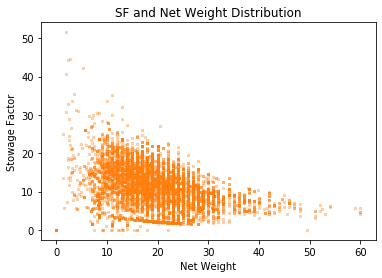

In [14]:
plt.scatter(toy_df['NW(KGS)'], toy_df['Stowage_Factor'], s=4, c='tab:orange', marker=',', norm= True, alpha=0.3)
plt.title('SF and Net Weight Distribution')
plt.ylabel('Stowage Factor')
plt.xlabel('Net Weight')

The distribution of the plot show us products that tend to be heavy with a small size in one hand, and others that tend to be light in weight, but rather voluminous. We could create subgroups to classify products for the consolidation of containers and cargoes arrange and freight rates.

## Clustering and Classification

As we want to classify the products according to their size and weight attributes, the _Stowage Factor_ and the _Net Weight_ are the variables chosen for the clustering. One describes the full product with the package, and the other only the product without the package.

In [15]:
toy_df.columns

Index(['Item No#', 'Description', 'Package', 'INNER', 'Qty/Ctn', 'CBM',
       'Carton long (cm)', 'Carton width', 'Carton height', 'Product long',
       'Product width', 'Product height', 'Packaging long', 'Packaging width',
       'Packaging height', 'GW(KGS)', 'NW(KGS)', 'Package_weight',
       'Stowage_Factor'],
      dtype='object')

In [16]:
X = toy_df.iloc[:,[16,18]]

In [17]:
X.shape

(10000, 2)

**Cleaning the data**

In [18]:
X.isnull().sum(axis = 0)

NW(KGS)           5
Stowage_Factor    0
dtype: int64

In [19]:
indexWeight = X[ X['NW(KGS)'] <= 0 ].index
# Delete rows with negative values
X.drop(indexWeight , inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
indexSF = X[ X['Stowage_Factor'] <= 0 ].index
# Delete negative values
X.drop(indexSF , inplace=True)

In [21]:
X.shape

(9304, 2)

In [22]:
X = X.dropna()

In [23]:
X.describe()

,NW(KGS),Stowage_Factor
count,9304.000000,9304.000000
mean,19.395591,11.523080
std,6.819248,4.936169
min,1.300000,0.125000
25%,15.000000,8.239524
50%,19.000000,11.538462
75%,23.000000,14.778986
max,60.000000,51.538462


#### Importing Tools

In [25]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

_And setup visualization options_

In [26]:
np.set_printoptions(precision = 4, suppress = True)
plt.figure(figsize=(20,6))

plt.style.use('seaborn-whitegrid')

<Figure size 1440x432 with 0 Axes>

### Creating a Dendrogram

A _dendrogram_ allows us to set an appropriate __number of clusters__

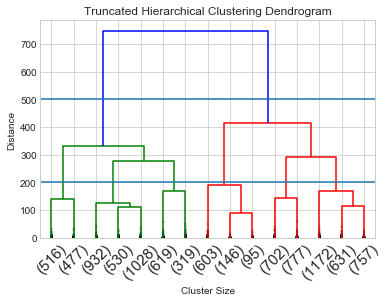

In [27]:
dendrogram = sch.dendrogram(sch.linkage(X, method ='ward'), truncate_mode= 'lastp', p=15, leaf_rotation=45, leaf_font_size = 15, show_contracted= True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

plt.axhline(y=500) # The max. distance choice between clusters
plt.axhline(y=200) # The min. distance choice between clusters

plt.show()

From the minimal distance between the cluster line that we have defined, the number of clusters that we could create is **6**.

In [28]:
Hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage ='ward')

In [31]:
y_hc = Hc.fit_predict(X)

In [32]:
Xarray = np.array(X)

### Clusters Visualization

Text(0.5, 1.0, 'Clusters of products')

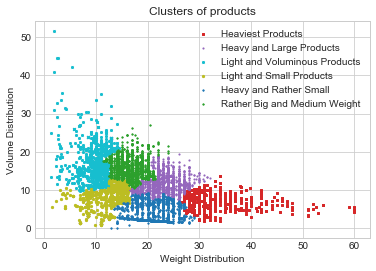

In [33]:
plt.scatter(Xarray[y_hc == 0,0], Xarray[y_hc == 0,1], s = 5, marker= ',', c = 'tab:red', label = 'Heaviest Products')
plt.scatter(Xarray[y_hc == 1,0], Xarray[y_hc == 1,1], s = 5, marker= '.', c = 'tab:purple', label = 'Heavy and Large Products')
plt.scatter(Xarray[y_hc == 2,0], Xarray[y_hc == 2,1], s = 5, marker= 'x', c = 'tab:cyan', label = 'Light and Voluminous Products')
plt.scatter(Xarray[y_hc == 3,0], Xarray[y_hc == 3,1], s = 5, marker= 'o', c = 'tab:olive', label = 'Light and Small Products')
plt.scatter(Xarray[y_hc == 4,0], Xarray[y_hc == 4,1], s = 5, marker= '2', c = 'tab:blue', label = 'Heavy and Rather Small')
plt.scatter(Xarray[y_hc == 5,0], Xarray[y_hc == 5,1], s = 5, marker= '3', c = 'tab:green', label = 'Rather Big and Medium Weight')
plt.xlabel ('Weight Distribution')
plt.ylabel ('Volume Distribution')
plt.legend()

plt.title('Clusters of products')

### Conclusion 

From the plot and the data analysis, we have classified the products into six categories:

- The Heaviest Products
- Products that are both Heavy and Large.
- Products that are heavy, but rather Small in size.
- Lightweight and Small products.
- Rather Voluminous, but Lightweight products.
- Lightweight but Voluminous Products.